# Job Descriptions Text Datasets

In [1]:
from text_data_toolkit import data_cleaning as dc
from text_data_toolkit import data_transformation as dt
from text_data_toolkit import eda
from text_data_toolkit import file_operations as fop
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
# Check out files in data folder
fop.list_files('../data')

['unigram_freq.csv',
 'DataScientist.csv',
 'job_postings.csv',
 'words_alpha.txt',
 'Restaurant_Reviews.csv',
 'job_summary_mini.csv',
 'filtered_unigrams.csv',
 'job_skills.csv',
 'Restaurant_Reviews.tsv',
 'job_summary.csv',
 'Restaurant_Reviews2.txt']

import data to dfs using method from data_cleaning
- DataScientist dataset is from 2020
- job_summary dataset is from 2024

We will see how much has changed in 4 years and what employers tend to look for

In [3]:
# Bulk load files to df
files = ['../data/DataScientist.csv',
         '../data/job_summary.csv',
         '../data/job_skills.csv',
         '../data/job_postings.csv']

dfs = dc.load_text_to_df(files, columns = None, line_length = 1)


In [4]:
# 2020 data set
df_ds_jobs_raw = dfs['DataScientist']
df_ds_jobs_raw.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


# 2020 Dataset

In [5]:
df_ds_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

# Clean Job Summaries

In [6]:
# drop unnamed column and index (both are indexes)
df_ds_jobs_raw = df_ds_jobs_raw.drop(["Unnamed: 0", "index"], axis = 1)

In [7]:
# fix column headers
dc.homogenize_columns(df_ds_jobs_raw)
df_ds_jobs_raw.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [8]:
df_ds_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          3909 non-null   object 
 1   salary_estimate    3909 non-null   object 
 2   job_description    3909 non-null   object 
 3   rating             3909 non-null   float64
 4   company_name       3909 non-null   object 
 5   location           3909 non-null   object 
 6   headquarters       3909 non-null   object 
 7   size               3909 non-null   object 
 8   founded            3909 non-null   int64  
 9   type_of_ownership  3909 non-null   object 
 10  industry           3909 non-null   object 
 11  sector             3909 non-null   object 
 12  revenue            3909 non-null   object 
 13  competitors        3909 non-null   object 
 14  easy_apply         3909 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 458.2+ KB


In [9]:
# data types look good, no NaN's present and no more duplicates
df_ds_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          3909 non-null   object 
 1   salary_estimate    3909 non-null   object 
 2   job_description    3909 non-null   object 
 3   rating             3909 non-null   float64
 4   company_name       3909 non-null   object 
 5   location           3909 non-null   object 
 6   headquarters       3909 non-null   object 
 7   size               3909 non-null   object 
 8   founded            3909 non-null   int64  
 9   type_of_ownership  3909 non-null   object 
 10  industry           3909 non-null   object 
 11  sector             3909 non-null   object 
 12  revenue            3909 non-null   object 
 13  competitors        3909 non-null   object 
 14  easy_apply         3909 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 458.2+ KB


In [10]:
# clean job descriptions column - normalize text
dc.clean_dataframe_no_dups(df_ds_jobs_raw, "job_description")

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),about hopper at hopper were on a mission to ma...,3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),at noom we use scientifically proven methods t...,4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),decode_m httpswwwdecodemcom data science manag...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),sapphire digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),director data science 200537 description edelm...,3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),about us tachyon technologies is a digital tra...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),job description interpret data analyze results...,5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),job descriptionthe security analytics data eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),the security analytics data engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [11]:
# check for irrelevant jobs, first normalize data
df_ds_jobs_raw_bad_titles = dc.normalize_data(df_ds_jobs_raw, "job_title")
df_ds_jobs_raw_bad_titles = df_ds_jobs_raw[~df_ds_jobs_raw["job_title"].str.contains("data|engineer|ml |machine learning|ai ", case=False, regex=True)]
df_ds_jobs_raw_bad_titles.head(10)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
6,quantitative researcher,$111K-$181K (Glassdoor est.),experience entrylevel phd program or experienc...,4.4,PDT Partners\n4.4,"New York, NY","New York, NY",51 to 200 employees,1993,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,quantitative research associate,$111K-$181K (Glassdoor est.),seeking a quant to work with senior researcher...,-1.0,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
9,quantitative researcher,$111K-$181K (Glassdoor est.),about the position at jane street we consider ...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
22,quantitative researcher intern us,$111K-$181K (Glassdoor est.),job description quantitative researchers at ci...,4.1,Citadel Securities\n4.1,"New York, NY","Chicago, IL",201 to 500 employees,2002,Company - Private,Brokerage Services,Finance,Unknown / Non-Applicable,Virtu Financial,-1
41,quantitative researcher quantitative research ...,$120K-$140K (Glassdoor est.),job description role summary at citadel securi...,4.1,Citadel Securities\n4.1,"New York, NY","Chicago, IL",201 to 500 employees,2002,Company - Private,Brokerage Services,Finance,Unknown / Non-Applicable,Virtu Financial,-1
48,quantitative research analyst,$120K-$140K (Glassdoor est.),please note this role is for experienced candi...,3.6,Tower Research Capital\n3.6,"New York, NY","New York, NY",501 to 1000 employees,1998,Company - Private,Financial Analytics & Research,Finance,Unknown / Non-Applicable,-1,-1
68,credit analytics manager,$119K-$147K (Glassdoor est.),about liberty lending llc liberty lending llc ...,4.0,Liberty Lending\n4.0,"New York, NY","New York, NY",51 to 200 employees,2015,Company - Private,Lending,Finance,Unknown / Non-Applicable,"SoFi, LendingClub, Freedom Financial Network",True
127,quantitative analyst intern,$102K-$121K (Glassdoor est.),what youll do daytoday for quantitative analys...,4.4,D. E. Shaw & Co.\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,1988,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,"Renaissance Technologies LLC, Two Sigma, AQR C...",True
143,applied scientist,$129K-$210K (Glassdoor est.),businessteam introduction the amazon demand fo...,3.9,Amazon\n3.9,"New York, NY","Seattle, WA",10000+ employees,1994,Company - Public,Internet,Information Technology,$10+ billion (USD),"Google, Microsoft, Walmart",-1
144,quantitative researcher portfolio modeling,$129K-$210K (Glassdoor est.),are you a quantitative researcher that has exp...,-1.0,Edward Daniels Group,"New York, NY","New York, NY",1 to 50 employees,2007,Company - Private,IT Services,Information Technology,$1 to $5 million (USD),-1,-1


Most of these jobs could be seen as irrelevant to data science. Removing 836 records would get rid of a huge chunk of our dataset. I will filter these by job_description as well to see if they are truly irrelevant

In [12]:
df_ds_jobs_raw_bad_titles_2nd = df_ds_jobs_raw_bad_titles[~df_ds_jobs_raw_bad_titles["job_description"].str.contains("python|machine learning|data science", case=False, regex=True)]
df_ds_jobs_raw_bad_titles_2nd

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
7,quantitative research associate,$111K-$181K (Glassdoor est.),seeking a quant to work with senior researcher...,-1.0,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
9,quantitative researcher,$111K-$181K (Glassdoor est.),about the position at jane street we consider ...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
48,quantitative research analyst,$120K-$140K (Glassdoor est.),please note this role is for experienced candi...,3.6,Tower Research Capital\n3.6,"New York, NY","New York, NY",501 to 1000 employees,1998,Company - Private,Financial Analytics & Research,Finance,Unknown / Non-Applicable,-1,-1
127,quantitative analyst intern,$102K-$121K (Glassdoor est.),what youll do daytoday for quantitative analys...,4.4,D. E. Shaw & Co.\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,1988,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,"Renaissance Technologies LLC, Two Sigma, AQR C...",True
165,business intelligence analyst,$156K-$254K (Glassdoor est.),about us simple health is on a mission to redu...,4.4,Simple Health\n4.4,"New York, NY","New York, NY",51 to 200 employees,2015,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,post doctoral scientist ri childhood cancer ca...,$39K-$86K (Glassdoor est.),job posting post doctoral scientist ri childho...,3.7,Nationwide Children's Hospital\n3.7,"Columbus, OH","Columbus, OH",10000+ employees,1892,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1
3884,senior research scientist ri ipp cooper,$55K-$112K (Glassdoor est.),job posting senior research scientist ri ipp c...,3.7,Nationwide Children's Hospital\n3.7,"Columbus, OH","Columbus, OH",10000+ employees,1892,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1
3893,biotransformation scientist and dmpk design lead,$55K-$112K (Glassdoor est.),help us transform patients' lives at ucb we pu...,3.7,UCB\n3.7,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),AbbVie,-1
3895,seniorprincipal scientist display technologiesngs,$55K-$112K (Glassdoor est.),help us transform patients' lives at ucb we pu...,3.7,UCB\n3.7,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),AbbVie,-1


I cut the list down by a few hundred, but from quickly browsing the descriptions in the second pass look, these jobs do seem to be truly irrelevant to data science, but might include other types of science or research. We're not looking for that though.

In [13]:
# remove irrelevant jobs
indexes_to_remove = df_ds_jobs_raw_bad_titles_2nd.index.tolist()
df_ds_jobs_raw.drop(indexes_to_remove, inplace=True)

In [14]:
df_ds_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3243 entries, 0 to 3907
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          3243 non-null   object 
 1   salary_estimate    3243 non-null   object 
 2   job_description    3243 non-null   object 
 3   rating             3243 non-null   float64
 4   company_name       3243 non-null   object 
 5   location           3243 non-null   object 
 6   headquarters       3243 non-null   object 
 7   size               3243 non-null   object 
 8   founded            3243 non-null   int64  
 9   type_of_ownership  3243 non-null   object 
 10  industry           3243 non-null   object 
 11  sector             3243 non-null   object 
 12  revenue            3243 non-null   object 
 13  competitors        3243 non-null   object 
 14  easy_apply         3243 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 405.4+ KB


In [15]:
# check for duplicates
print(df_ds_jobs_raw.duplicated().sum())
df_ds_jobs_raw["job_description"].duplicated().sum()

0


np.int64(203)

We have some duplicate job descriptions. We will look into this

In [16]:
# check out duplicate summaries
df_ds_jobs_raw[df_ds_jobs_raw["job_description"].duplicated(keep=False)].groupby("job_description").size().reset_index(name='count')

,job_description,count
0,ability to coordinate with people of many diff...,2
1,ability to develop analytics for multiple cybe...,2
2,about freestar freestar engineers cuttingedge ...,2
3,are you interested in helping texas create com...,2
4,as a team member in the finance and internal a...,2
...,...,...
102,we seek to fill the role of a senior futures q...,2
103,who we are at maven wave we are relentless in ...,2
104,who we look for an sei consultant is a master ...,3
105,who we look for an sei consultant is a master ...,3


There are a lot of exact duplicate job descriptions. These could be due to different locations having the same position open.

An example is searching for IBM below. They have tons of the same job title, but in different cities or with different pay. I would remove these extras as it will saturate the visualizations.

In [17]:
df_ds_jobs_raw[df_ds_jobs_raw['company_name'].str.contains('IBM', case=False)].sort_values(by='job_title').head(7)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
3174,microsoft analytics consultant,$141K-$225K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"San Jose, CA","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
2556,microsoft analytics consultant,$49K-$78K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Dallas, TX","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
1381,microsoft analytics consultant,$46K-$104K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Phoenix, AZ","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
1126,microsoft analytics consultant,$36K-$71K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Houston, TX","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
877,microsoft analytics consultant,$76K-$147K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Chicago, IL","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
3329,microsoft analytics consultant,$100K-$152K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Austin, TX","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1
1695,microsoft analytics consultant,$44K-$80K (Glassdoor est.),introduction as an ibm consultant you directly...,3.7,IBM\n3.7,"Philadelphia, PA","Armonk, NY",10000+ employees,1911,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",-1


In [18]:
# remove duplicates, but use the original df when plotting location data
df_ds_jobs_raw_no_dups = df_ds_jobs_raw.drop_duplicates(subset=["job_description"], keep="first")

In [19]:
# check if any duplicates left
df_ds_jobs_raw_no_dups["job_description"].duplicated().sum()

np.int64(0)

No more dups, irrelevant jobs, and no missing values. The data is ready for EDA

# EDA

In [20]:
# skill count
labeled_job_skills_2020 = dt.label_total_job_skills(df_ds_jobs_raw_no_dups, "job_description", custom_skills=None)
labeled_job_skills_2020

{'pytorch': 130,
 'machine learning': 3012,
 'nlp': 302,
 'snowflake': 209,
 'python': 2685,
 'html': 77,
 'tableau': 809,
 'pyspark': 107,
 'javascript': 186,
 'cloud': 1715,
 'regex': 4,
 'spark': 1353,
 'sql': 3657,
 'scikit': 168,
 'react': 62}

Python, SQL, and Machine Learning are mentioned the most which is expected. Companies also seem to want cloud, spark and tableau experience.

In [21]:
# this could be used when first looking at a dataset over df.info()
text_summary_stats_2020 = eda.text_summary_stats(df_ds_jobs_raw_no_dups, "job_description")
text_summary_stats_2020

{'document_stats': {'total_docs': 3040, 'empty_docs': 0, 'unique_docs': 3040},
 'length_stats': {'min_length': 41,
  'max_length': 19398,
  'total_length': 9912028,
  'char_count_mean': 3260.5355263157894,
  'char_count_median': 3024.5},
 'word_stats': {'avg_words_per_doc': 470.7055921052632,
  'total_words': 1430945,
  'unique_words': 31333,
  'avg_word_length': 5.928984691934351},
 'frequent_words': {'data': 31584,
  'experience': 15799,
  'business': 7810,
  'work': 7320,
  'will': 7136,
  'team': 5762,
  'skills': 5152,
  'science': 4570,
  'years': 4469,
  'analysis': 4228}}

Data shows up as the most frequent word, but not in the word cloud. The word cloud is pairing data with other words. ie. "Data Management", "Data Science"

In [22]:
# top ngrams
top_ngrams_2020 = eda.top_ngrams(df_ds_jobs_raw_no_dups["job_description"])
top_ngrams_2020

[(('experience', 'with'), 4219),
 (('of', 'the'), 4020),
 (('ability', 'to'), 3671),
 (('in', 'the'), 3327),
 (('experience', 'in'), 3217),
 (('machine', 'learning'), 2910),
 (('years', 'of'), 2765),
 (('in', 'a'), 2743),
 (('data', 'science'), 2452),
 (('you', 'will'), 2322)]

In [23]:
# top ngrams with stopwords
stopwords = ['of', 'the', 'be', 'to', 'show', 'equal', 'as', 'this']
top_ngrams_2020_stopwords = eda.top_ngrams(df_ds_jobs_raw_no_dups["job_description"], stopwords, n=3, top_k=15)
top_ngrams_2020_stopwords

[(('in', 'computer', 'science'), 762),
 (('years', 'experience', 'in'), 753),
 (('an', 'opportunity', 'employer'), 619),
 (('experience', 'working', 'with'), 607),
 (('bachelors', 'degree', 'in'), 533),
 (('or', 'any', 'other'), 527),
 (('sexual', 'orientation', 'gender'), 500),
 (('are', 'looking', 'for'), 494),
 (('looking', 'for', 'a'), 478),
 (('is', 'a', 'plus'), 477),
 (('and', 'machine', 'learning'), 463),
 (('computer', 'science', 'or'), 457),
 (('race', 'color', 'religion'), 450),
 (('we', 'are', 'looking'), 449),
 (('is', 'an', 'opportunity'), 443)]

These top ngrams are very telling. Seems like employers really want computer science majors in data science roles! Experience and college degrees matter a lot

# Visualization

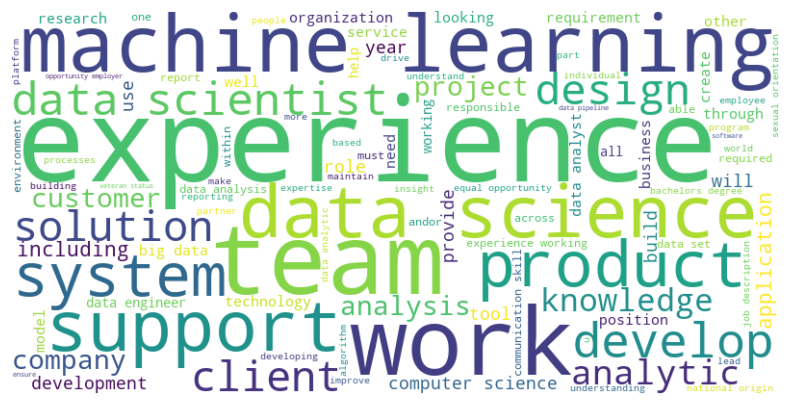

In [24]:
# generate word cloud with more stop words - 11s
more_stopwords = ["such", "ability", "d"]
wordcloud_2020 = eda.generate_wordcloud(df_ds_jobs_raw_no_dups["job_description"], more_stopwords)
wordcloud_2020

We get a good idea here of the most used words in the dataset.

There is a lot of emphasis on experience, team, machine learning and ability.

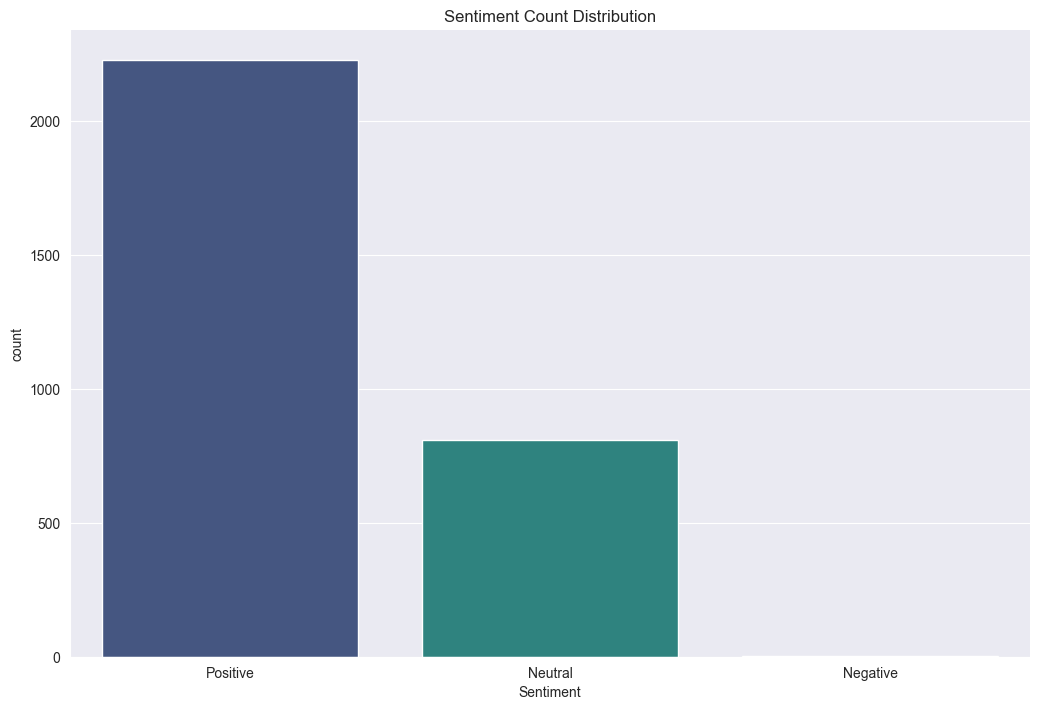

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,Sentiment
0,senior data scientist,$111K-$181K (Glassdoor est.),about hopper at hopper were on a mission to ma...,3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,Positive
1,data scientist product analytics,$111K-$181K (Glassdoor est.),at noom we use scientifically proven methods t...,4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,Positive
2,data science manager,$111K-$181K (Glassdoor est.),decode_m httpswwwdecodemcom data science manag...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,Positive
3,data analyst,$111K-$181K (Glassdoor est.),sapphire digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,Positive
4,director data science,$111K-$181K (Glassdoor est.),director data science 200537 description edelm...,3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,Positive


In [25]:
# check sentiment distribution of descriptions
sentiment_dist_2020 = eda.plot_sentiment_distribution(df_ds_jobs_raw_no_dups, "job_description")
sentiment_dist_2020.head(5)

The negative plot being almost empty make sense as you wouldn't want to see negative descriptions where you want to attract applicants. It also makes sense that most descriptions have a neutral sentiment. It would be interesting to know if the ones with positive sentiment would be more desirable companies to work for.

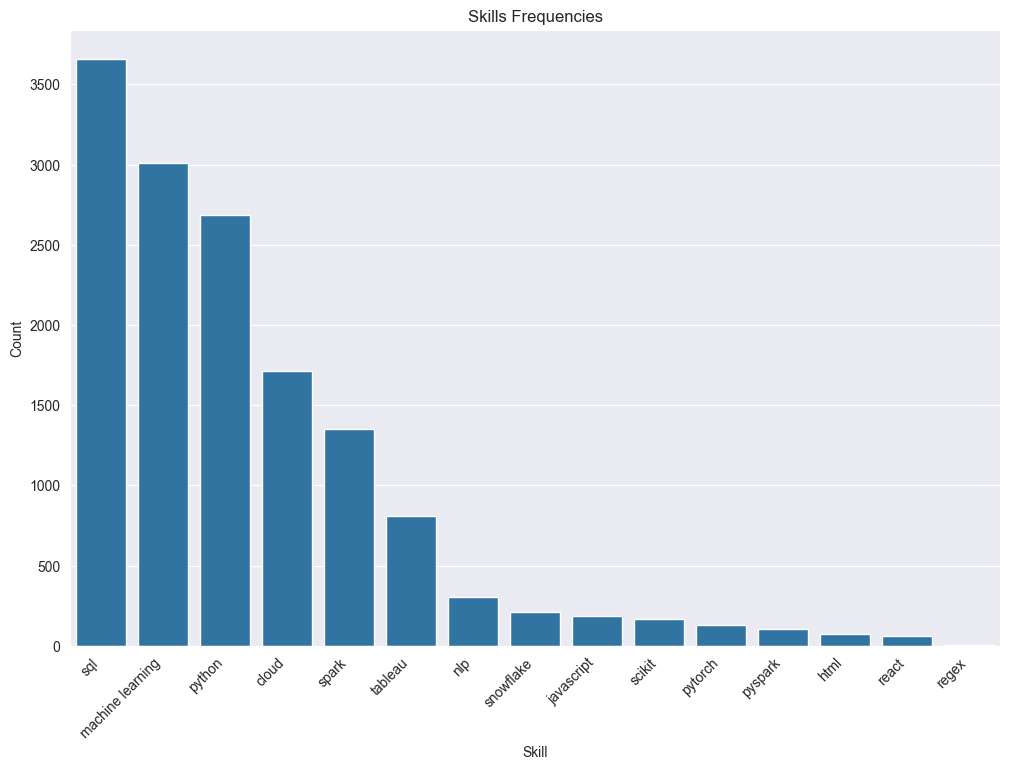

In [26]:
# plot a bar chart of the most common skills asked for in 2020
df_barplot_2020 = pd.DataFrame({
    "word": list(labeled_job_skills_2020.keys()),
    "count": list(labeled_job_skills_2020.values())
})

df_barplot_2020 = df_barplot_2020.sort_values('count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_barplot_2020,x="word", y="count")
plt.title('Skills Frequencies')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

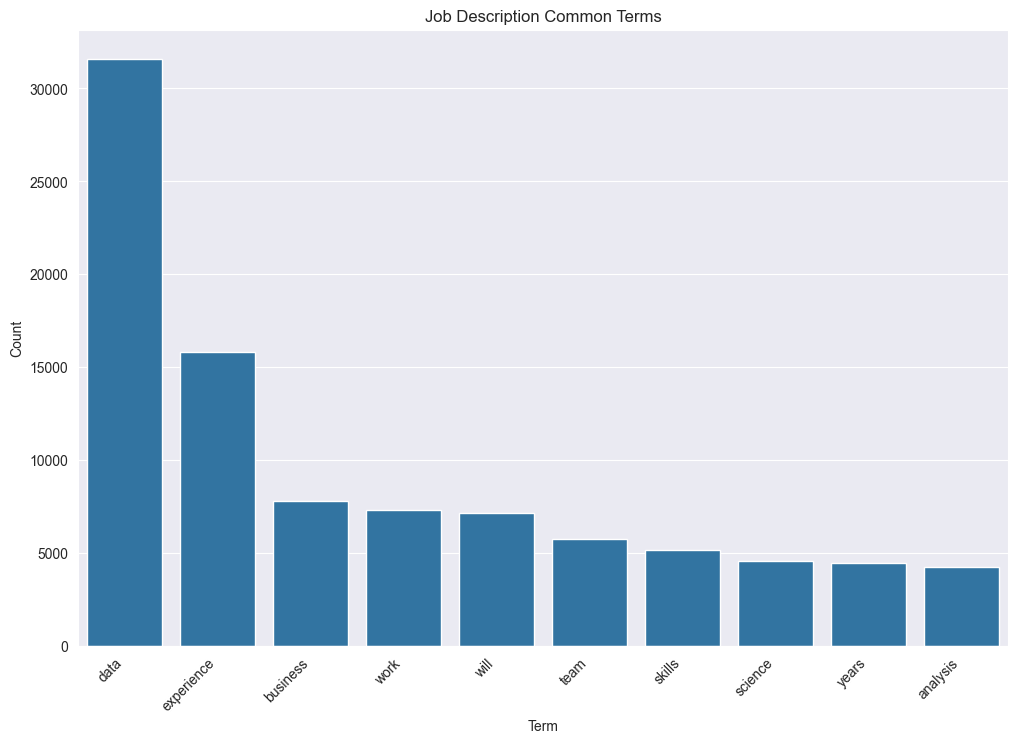

In [27]:
# plot bar chart of common words used in job descriptions in 2020
df_barplot_text_summary_2020 = pd.DataFrame({
    "word": list(text_summary_stats_2020["frequent_words"].keys()),
    "count": list(text_summary_stats_2020["frequent_words"].values())
})

df_barplot_text_summary_2020 = df_barplot_text_summary_2020.sort_values('count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_barplot_text_summary_2020,x="word", y="count")
plt.title('Job Description Common Terms')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2024 dataset

Create dfs for 2024 job files

In [28]:
df_job_summaries_raw = dfs['job_summary']
df_job_summaries_raw.shape

(12217, 2)

In [29]:
df_job_skills_raw = dfs['job_skills']
df_job_skills_raw.shape

(12217, 2)

In [30]:
df_job_postings_raw = dfs['job_postings']
df_job_postings_raw.shape

(12217, 15)

The job_ csvs have the same amount of rows in all files so we may be able to join these into one df.


In [31]:
# check if rows line up in each file
print("First index")
print(df_job_summaries_raw.iloc[0, 0])
print(df_job_skills_raw.iloc[0, 0])
print(df_job_postings_raw.iloc[0, 0])
print("Random Index")
print(df_job_summaries_raw.iloc[876, 0])
print(df_job_skills_raw.iloc[876, 0])
print(df_job_postings_raw.iloc[876, 0])


First index
https://www.linkedin.com/jobs/view/senior-machine-learning-engineer-at-jobs-for-humanity-3804053819
https://www.linkedin.com/jobs/view/senior-machine-learning-engineer-at-jobs-for-humanity-3804053819
https://www.linkedin.com/jobs/view/senior-machine-learning-engineer-at-jobs-for-humanity-3804053819
Random Index
https://uk.linkedin.com/jobs/view/senior-data-analyst-financial-crime-at-nala-3805461162
https://uk.linkedin.com/jobs/view/senior-data-analyst-financial-crime-at-nala-3805461162
https://uk.linkedin.com/jobs/view/senior-data-analyst-financial-crime-at-nala-3805461162


Upon checking, the rows do line up with eachother by index, so this would be an easy join. They could have been joined off of job_link either way

In [32]:
# join the job_ tables
merged_jobs_raw_2 = pd.merge(df_job_summaries_raw, df_job_postings_raw, left_index=True, right_index=True)
merged_jobs_raw = pd.merge(merged_jobs_raw_2, df_job_skills_raw, left_index=True, right_index=True)
print(merged_jobs_raw.shape) # check column count
merged_jobs_raw.head() # check that merge worked

(12217, 19)


,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,Company Description\nJobs for Humanity is part...,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"Location: New York City, NY\nPosition Summary\...",https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,Responsibilities:\nCandidate must have signifi...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,Dice is the leading career destination for tec...,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


# Clean Job Summaries


In [33]:
# check for NaNs and look at stats for dataset
text_summary_stats_2024 = eda.text_summary_stats(merged_jobs_raw, "job_summary")
text_summary_stats_2024 # setting as variable so we can plot frequent words

{'document_stats': {'total_docs': 12217, 'empty_docs': 0, 'unique_docs': 9561},
 'length_stats': {'min_length': 20,
  'max_length': 18849,
  'total_length': 50786295,
  'char_count_mean': 4157.01849881313,
  'char_count_median': 3884},
 'word_stats': {'avg_words_per_doc': 605.3316689858394,
  'total_words': 7395337,
  'unique_words': 69988,
  'avg_word_length': 5.868988120487274},
 'frequent_words': {'data': 122953,
  'experience': 65829,
  'will': 36123,
  'work': 35205,
  'team': 29121,
  'business': 28414,
  'more': 24710,
  'show': 24670,
  'skills': 22749,
  'years': 21904}}

A few NaN's in job_skills and one location. We will investigate this.

In [34]:
# check for NA records
merged_jobs_raw[merged_jobs_raw["job_skills"].isna()]

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills
670,https://www.linkedin.com/jobs/view/mltc-nurse-...,overview do you have a passion for caring for ...,https://www.linkedin.com/jobs/view/mltc-nurse-...,2024-01-19 16:48:10.353136+00,Finished NER,t,t,f,MLTC-Nurse Care Manager (Brooklyn Office),RiverSpring Living,"Brooklyn, NY",2024-01-14,Freeport,United States,Dispatcher Service,Mid senior,Onsite,https://www.linkedin.com/jobs/view/mltc-nurse-...,NaN
7898,https://www.linkedin.com/jobs/view/high-school...,high school speechlanguage pathologist fmla an...,https://www.linkedin.com/jobs/view/high-school...,2024-01-19 13:33:45.46882+00,Finished NER,t,t,f,High School Speech-Language Pathologist: FMLA,AnthroMed Education,"Summit, IL",2024-01-13,Chicago,United States,Pathologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/high-school...,NaN
9598,https://uk.linkedin.com/jobs/view/notam-aviati...,nats is the uks leading air navigation service...,https://uk.linkedin.com/jobs/view/notam-aviati...,2024-01-21 14:13:25.895518+00,Finished NER,t,t,f,NOTAM Aviation Data Operator,NATS,"Swanwick, England, United Kingdom",2024-01-14,Derby,United Kingdom,Solutions Operator,Associate,Onsite,https://uk.linkedin.com/jobs/view/notam-aviati...,NaN
10840,https://www.linkedin.com/jobs/view/mltc-nurse-...,overview do you have a passion for caring for ...,https://www.linkedin.com/jobs/view/mltc-nurse-...,2024-01-20 13:11:57.737368+00,Finished NER,t,t,f,MLTC-Nurse Care Manager- Bilingual Russian (Br...,RiverSpring Living,"Brooklyn, NY",2024-01-14,Westfield,United States,Dye-House Supervisor,Mid senior,Onsite,https://www.linkedin.com/jobs/view/mltc-nurse-...,NaN
10846,https://www.linkedin.com/jobs/view/medical-lab...,osha risk factor category i physical demands m...,https://www.linkedin.com/jobs/view/medical-lab...,2024-01-20 13:17:44.334222+00,Finished NER,t,t,f,Medical Lab Technician (MLT) PRN,Lifepoint Health®,"Hot Springs, AR",2024-01-13,Arkansas,United States,Fitter I,Mid senior,Onsite,https://www.linkedin.com/jobs/view/medical-lab...,NaN


These jobs with NaN's in job_skills don't even look like data jobs. It's worth looking through the rest of the job_titles to see how many more are irrelevant.

In [35]:
# check for irrelevant jobs, homogenize job titles first
merged_jobs_raw["clean_job_title"] = merged_jobs_raw["job_title"].str.lower().str.replace(r'[^\w\s]', '', regex=True)

merged_jobs_bad_titles = merged_jobs_raw[~merged_jobs_raw["clean_job_title"].str.contains("data|engineer|ml |machine learning", case=False, regex=True)]
merged_jobs_bad_titles

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title
12,https://www.linkedin.com/jobs/view/4-corporate...,job 1 corporate associate the ideal candidate ...,https://www.linkedin.com/jobs/view/4-corporate...,2024-01-21 05:31:32.650457+00,Finished NER,t,t,f,4 Corporate Associate Positions (AmLaw),LHH,"Atlanta, GA",2024-01-16,Crookston,United States,Floor Worker,Associate,Onsite,https://www.linkedin.com/jobs/view/4-corporate...,"Corporate Law, Private Equity, Venture Capital...",4 corporate associate positions amlaw
57,https://www.linkedin.com/jobs/view/medical-lab...,summary now offering upto 5000 signon bonus jo...,https://www.linkedin.com/jobs/view/medical-lab...,2024-01-21 07:04:48.563174+00,Finished NER,t,t,f,Medical Laboratory Scientist MLS-MT - Incentiv...,"St. Luke's Duluth, MN","Duluth, MN",2024-01-14,Minnesota,United States,Medical Technologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/medical-lab...,"Medical Laboratory Science, ASCP Certification...",medical laboratory scientist mlsmt incentive ...
58,https://www.linkedin.com/jobs/view/registered-...,entrust your career to healthtrustmedical lab ...,https://www.linkedin.com/jobs/view/registered-...,2024-01-19 23:01:06.52416+00,Finished NER,t,t,f,Registered Nurse (RN) - Medical Laboratory Tec...,Health eCareers,"Austin, TX",2024-01-15,Austin,United States,Cytotechnologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/registered-...,"Medical Lab Technician (MLT), Compassion, Atte...",registered nurse rn medical laboratory tech m...
63,https://www.linkedin.com/jobs/view/medical-tec...,title medical technologist location columbus o...,https://www.linkedin.com/jobs/view/medical-tec...,2024-01-19 22:19:44.002824+00,Finished NER,t,t,f,Medical Technologist MT or MLT,Gables Search Group,"Columbus, OH",2024-01-15,Columbus,United States,Aquatic Biologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/medical-tec...,"Medical Technologist, Medical Laboratory Techn...",medical technologist mt or mlt
112,https://www.linkedin.com/jobs/view/mls-dayshif...,with a legacy that spans over 150 years bon se...,https://www.linkedin.com/jobs/view/mls-dayshif...,2024-01-19 17:05:58.912618+00,Finished NER,t,t,f,MLS Dayshift Lead - Short Pump Emergency Center,Bon Secours,"Henrico, VA",2024-01-16,Virginia,United States,Supervisor Instrument Maintenance,Mid senior,Onsite,https://www.linkedin.com/jobs/view/mls-dayshif...,"Medical Lab Scientist Certification, Clinical ...",mls dayshift lead short pump emergency center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,https://www.linkedin.com/jobs/view/product-man...,job description senior product manageraiml man...,https://www.linkedin.com/jobs/view/product-man...,2024-01-21 05:39:58.890809+00,Finished NER,t,t,f,Product Manager Ecommerce / Retail / AI/ML,Photon,San Francisco Bay Area,2024-01-14,Union City,United States,Scanner,Mid senior,Onsite,https://www.linkedin.com/jobs/view/product-man...,"Product Management, Artificial Intelligence, M...",product manager ecommerce retail aiml
12161,https://www.linkedin.com/jobs/view/medical-lab...,this is a contract to hire job opportunity pos...,https://www.linkedin.com/jobs/view/medical-lab...,2024-01-21 07:07:59.116126+00,Finished NER,t,t,f,Medical Laboratory Scientist MT/MLS Lab Lead 7548,"True North Consulting, LLC(Kansas City)","Melrose, MA",2024-01-14,Gloucester,United States,Biologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/medical-lab...,"Medical Laboratory Scientist, Blood Bank Exper...",medical laboratory scientist mtmls lab lead 7548
12166,https://www.linkedin.com/jobs/view/medical-tec...,job description medical lab technician medical...,https://www.linkedin.com/jobs/view/medical-tec...,2024-01-21 08:07:01.59659+00,Finished NER,t,t,f,Medi

A lot of junk in this dataframe! I can safely remove all 887 of these as they are completely irellevant to data science

In [36]:
# remove bad job titles
indexes_to_remove = merged_jobs_bad_titles.index.tolist()
merged_jobs_raw.drop(indexes_to_remove, inplace=True)

In [37]:
merged_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11330 entries, 0 to 12215
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link_x           11330 non-null  object
 1   job_summary          11330 non-null  object
 2   job_link_y           11330 non-null  object
 3   last_processed_time  11330 non-null  object
 4   last_status          11330 non-null  object
 5   got_summary          11330 non-null  object
 6   got_ner              11330 non-null  object
 7   is_being_worked      11330 non-null  object
 8   job_title            11330 non-null  object
 9   company              11330 non-null  object
 10  job_location         11329 non-null  object
 11  first_seen           11330 non-null  object
 12  search_city          11330 non-null  object
 13  search_country       11330 non-null  object
 14  search_position      11330 non-null  object
 15  job_level            11330 non-null  object
 16  job_type 

Still one more NaN job_skill and location.

In [38]:
merged_jobs_raw[merged_jobs_raw["job_location"].isna()]

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title
9885,https://www.linkedin.com/jobs/view/sr-data-eng...,what to expect cells are the common denominato...,https://www.linkedin.com/jobs/view/sr-data-eng...,2024-01-20 04:25:45.213731+00,Finished NER,t,t,f,"Sr. Data Engineer, Abuse Test & Engineering",Tesla,NaN,2024-01-17,Alameda,United States,Test Engineer Mechanical Equipment,Mid senior,Onsite,https://www.linkedin.com/jobs/view/sr-data-eng...,"Apache Spark, Pandas, NumPy, Matlab, Python, S...",sr data engineer abuse test engineering


This job is relevant and the location doesn't matter too much. It could be remote.

In [39]:
merged_jobs_raw[merged_jobs_raw["job_skills"].isna()]

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title
9598,https://uk.linkedin.com/jobs/view/notam-aviati...,nats is the uks leading air navigation service...,https://uk.linkedin.com/jobs/view/notam-aviati...,2024-01-21 14:13:25.895518+00,Finished NER,t,t,f,NOTAM Aviation Data Operator,NATS,"Swanwick, England, United Kingdom",2024-01-14,Derby,United Kingdom,Solutions Operator,Associate,Onsite,https://uk.linkedin.com/jobs/view/notam-aviati...,NaN,notam aviation data operator


This position is irrelevant as well. I will remove it manually despite it having the word "data" in it.

In [40]:
# remove single record
merged_jobs_raw.drop(9598, inplace=True)

In [41]:
merged_jobs_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11329 entries, 0 to 12215
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link_x           11329 non-null  object
 1   job_summary          11329 non-null  object
 2   job_link_y           11329 non-null  object
 3   last_processed_time  11329 non-null  object
 4   last_status          11329 non-null  object
 5   got_summary          11329 non-null  object
 6   got_ner              11329 non-null  object
 7   is_being_worked      11329 non-null  object
 8   job_title            11329 non-null  object
 9   company              11329 non-null  object
 10  job_location         11328 non-null  object
 11  first_seen           11329 non-null  object
 12  search_city          11329 non-null  object
 13  search_country       11329 non-null  object
 14  search_position      11329 non-null  object
 15  job_level            11329 non-null  object
 16  job_type 

In [42]:
# check for duplicates
print(merged_jobs_raw.duplicated().sum())
merged_jobs_raw.duplicated(subset="job_summary").sum()

0


np.int64(2449)

In [43]:
# check out duplicate summaries
merged_jobs_raw[merged_jobs_raw["job_summary"].duplicated(keep=False)].groupby("job_summary").size().reset_index(name='count')

,job_summary,count
0,seeking an epic clarity data analyst with a c...,2
1,whatnot whatnot is a livestream shopping plat...,2
2,100 onsite role must be local to nj and under ...,2
3,11 west 19th street 22008 united states of ame...,2
4,130 5th ave 22130 united states of america new...,4
...,...,...
703,working title data steward job class research ...,25
704,working with us challenging meaningful lifecha...,3
705,working with us challenging meaningful lifecha...,4
706,working with us challenging meaningful lifecha...,2


This could be due to the same job in a different city, I would still count these as duplicates and remove them.

In [44]:
# Get rows with duplicated job_summary values
duplicated_jobs = merged_jobs_raw[merged_jobs_raw["job_summary"].duplicated(keep=False)]

# Sort by job_summary to group duplicates together for easier viewing
duplicated_jobs_sorted = duplicated_jobs.sort_values("job_summary")

# To also see the count for each duplicated job_summary
summary_counts = duplicated_jobs.groupby("job_summary").size().reset_index(name='count')

# Merge the counts back with the full data
duplicated_with_counts = pd.merge(
    duplicated_jobs_sorted,
    summary_counts,
    on="job_summary"
)

# Now show the result, with all columns and the count
duplicated_with_counts

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,...,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title,count
0,https://www.linkedin.com/jobs/view/data-analys...,seeking an epic clarity data analyst with a c...,https://www.linkedin.com/jobs/view/data-analys...,2024-01-20 07:11:45.79896+00,Finished NER,t,t,f,Data Analyst(EPCI/EHR),Intellectt Inc,...,2024-01-14,Lakehurst,United States,Tumor Registrar,Mid senior,Onsite,https://www.linkedin.com/jobs/view/data-analys...,"Epic Clarity, Data Analysis, Healthcare, Clini...",data analystepciehr,2
1,https://www.linkedin.com/jobs/view/epic-clarit...,seeking an epic clarity data analyst with a c...,https://www.linkedin.com/jobs/view/epic-clarit...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Epic Clarity Data Analyst,Intellectt Inc,...,2024-01-13,Lakehurst,United States,Data Entry Clerk,Mid senior,Onsite,https://www.linkedin.com/jobs/view/epic-clarit...,"Epic Clarity Data Analyst, Clinical informatic...",epic clarity data analyst,2
2,https://www.linkedin.com/jobs/view/machine-lea...,whatnot whatnot is a livestream shopping plat...,https://www.linkedin.com/jobs/view/machine-lea...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Machine Learning Scientist,Whatnot,...,2024-01-12,Syracuse,United States,Biologist,Mid senior,Onsite,https://www.linkedin.com/jobs/view/machine-lea...,"Python, SQL, NumPy, SciPy, Pandas, ScikitLearn...",machine learning scientist,2
3,https://www.linkedin.com/jobs/view/machine-lea...,whatnot whatnot is a livestream shopping plat...,https://www.linkedin.com/jobs/view/machine-lea...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Machine Learning Scientist,Whatnot,...,2024-01-12,Syracuse,United States,Agricultural-Research Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/machine-lea...,"Machine Learning Engineering, Data Analysis, S...",machine learning scientist,2
4,https://www.linkedin.com/jobs/view/data-analys...,100 onsite role must be local to nj and under ...,https://www.linkedin.com/jobs/view/data-analys...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,DATA ANALYST,Steneral Consulting,...,2024-01-13,New Jersey,United States,Data Entry Clerk,Associate,Onsite,https://www.linkedin.com/jobs/view/data-analys...,"Onsite, Excel, Sage 100 ERP, FactoryMaster, Da...",data analyst,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,https://www.linkedin.com/jobs/view/principal-s...,working with us challenging meaningful lifecha...,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 02:48:32.021907+00,Finished NER,t,t,f,Principal Scientist - Machine Learning and AI,Bristol Myers Squibb,...,2024-01-16,Seattle,United States,Programmer Engineering And Scientific,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-s...,"Machine Learning, AI, Principal Scientist, Com...",principal scientist machine learning and ai,4
3153,https://www.linkedin.com/jobs/view/principal-d...,working with us challenging meaningful lifecha...,https://www.linkedin.com/jobs/view/principal-d...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Principal Data Engineer, MS&T Robustness & Dig...",Bristol Myers Squibb,...,2024-01-13,Fitchburg,United States,Computer Systems Hardware Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-d...,"Data Engineering, Data Architecture, Software ...",principal data engineer mst robustness digita...,2
3154,https://www.linkedin.com/jobs/view/principal-d...,working with us challenging meaningful lifecha...,https://www.linkedin.com/jobs/view/principal-d...,2024-01-20 02:56:52.351258+00,Finished NER,t,t,f,"Principal Data Engineer, MS&T Robustness & Dig...",Bristol Myers Squibb,...,2024-01-14,Cranford,United States,Manufacturing Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-d...,"Data Engineering, Data Governance, DataOps,

Looking through these results confirms that most of these duplicates belong to the same job application, but for different cities. Here's a good example:

All the cities are different, but they are the same role.

In [45]:
company = 'Nigel Frank International'

merged_jobs_raw[merged_jobs_raw['company'] == company]

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title
1290,https://uk.linkedin.com/jobs/view/senior-cloud...,senior cloud data engineer 70000 i am working ...,https://uk.linkedin.com/jobs/view/senior-cloud...,2024-01-19 23:59:06.614685+00,Finished NER,t,t,f,"Senior Cloud Data Engineer - GBP70,000",Nigel Frank International,"Telford, England, United Kingdom",2024-01-14,Telford,United Kingdom,Data Base Administrator,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/senior-cloud...,"Azure, Azure Data Factory, Synapse, Azure Data...",senior cloud data engineer gbp70000
1621,https://uk.linkedin.com/jobs/view/senior-cloud...,senior cloud data engineer 70000 i am working ...,https://uk.linkedin.com/jobs/view/senior-cloud...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Senior Cloud Data Engineer - GBP70,000",Nigel Frank International,"Stoke-on-Trent, England, United Kingdom",2024-01-13,Stoke-on-Trent,United Kingdom,Computer Systems Hardware Analyst,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/senior-cloud...,"Azure Data Factory, Synapse, Azure Data Lake, ...",senior cloud data engineer gbp70000
2451,https://uk.linkedin.com/jobs/view/senior-cloud...,senior cloud data engineer 70000 i am working ...,https://uk.linkedin.com/jobs/view/senior-cloud...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Senior Cloud Data Engineer - GBP70,000",Nigel Frank International,"Nottingham, England, United Kingdom",2024-01-12,Derby,United Kingdom,Agricultural-Research Engineer,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/senior-cloud...,"Azure, Azure Data Factory, Synapse, Azure Data...",senior cloud data engineer gbp70000
3474,https://uk.linkedin.com/jobs/view/senior-cloud...,senior cloud data engineer 70000 i am working ...,https://uk.linkedin.com/jobs/view/senior-cloud...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Senior Cloud Data Engineer - GBP70,000",Nigel Frank International,"Leeds, England, United Kingdom",2024-01-13,York,United Kingdom,Data Base Administrator,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/senior-cloud...,"Azure, Synapse, Azure Data Factory, Azure Data...",senior cloud data engineer gbp70000
3479,https://uk.linkedin.com/jobs/view/senior-cloud...,senior cloud data engineer 70000 i am working ...,https://uk.linkedin.com/jobs/view/senior-cloud...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Senior Cloud Data Engineer - GBP70,000",Nigel Frank International,"Worcester, England, United Kingdom",2024-01-13,Gloucester,United Kingdom,Data Base Administrator,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/senior-cloud...,"Azure tech stack, Azure Data Factory, Synapse,...",senior cloud data engineer gbp70000
3517,https://uk.linkedin.com/jobs/view/technical-bu...,a growing data consultancy are looking for an ...,https://uk.linkedin.com/jobs/view/technical-bu...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Technical Business Analyst - Data Solutions,Nigel Frank International,"Cheltenham, England, United Kingdom",2024-01-13,Gloucester,United Kingdom,Data Entry Clerk,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/technical-bu...,"Business Analysis, Data Analytics, Technology ...",technical business analyst data solutions
3595,https://uk.linkedin.com/jobs/view/technical-bu...,a growing data consultancy are looking for an ...,https://uk.linkedin.com/jobs/view/technical-bu...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Technical Business Analyst - Data Solutions,Nigel Frank International,"Manchester, England, United Kingdom",2024-01-13,Blackburn,United Kingdom,Data Entry Clerk,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/technical-bu...,"Data Consultancy, Business Analyst, Public Sec...",technical business analyst data solutions
3635,https://uk.linkedin.com/jobs/view/data-analyst...,a healthcare pr

In [46]:
# remove duplicates - keep first as we do not care about city at the moment, maybe do a plot with cities containing the duplicates
merged_jobs_raw_no_dups = merged_jobs_raw.drop_duplicates(subset=["job_summary"], keep="first")

In [47]:
# make sure duplicates are gone
eda.text_summary_stats(merged_jobs_raw_no_dups, "job_summary")

{'document_stats': {'total_docs': 8880, 'empty_docs': 0, 'unique_docs': 8880},
 'length_stats': {'min_length': 20,
  'max_length': 18849,
  'total_length': 35499539,
  'char_count_mean': 3997.695833333333,
  'char_count_median': 3758.0},
 'word_stats': {'avg_words_per_doc': 580.1171171171171,
  'total_words': 5151440,
  'unique_words': 65873,
  'avg_word_length': 5.8929058670973555},
 'frequent_words': {'data': 97493,
  'experience': 47039,
  'will': 24625,
  'work': 23999,
  'business': 21251,
  'team': 19473,
  'show': 17952,
  'skills': 17094,
  'more': 16918,
  'management': 15759}}

In [48]:
# clean df of whitespaces and punctuation
merged_jobs_raw_clean_summary = dc.clean_dataframe_no_dups(merged_jobs_raw_no_dups, "job_summary")
merged_jobs_raw_clean_summary.head()

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title
0,https://www.linkedin.com/jobs/view/senior-mach...,company description jobs for humanity is partn...,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ...",senior machine learning engineer
1,https://www.linkedin.com/jobs/view/principal-s...,who we are aurora nasdaq aur is delivering the...,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",principal software engineer ml accelerators
2,https://www.linkedin.com/jobs/view/senior-etl-...,location new york city ny position summary our...,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da...",senior etl data warehouse specialist
3,https://www.linkedin.com/jobs/view/senior-data...,responsibilities candidate must have significa...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi...",senior data warehouse developer architect
4,https://www.linkedin.com/jobs/view/lead-data-e...,dice is the leading career destination for tec...,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",lead data engineer


# EDA

In [49]:
# skill count
labeled_job_skills_2024 = dt.label_total_job_skills(merged_jobs_raw_clean_summary, "job_summary", custom_skills=None)
labeled_job_skills_2024

{'pytorch': 441,
 'machine learning': 5084,
 'nlp': 396,
 'snowflake': 1523,
 'python': 4781,
 'html': 179,
 'tableau': 1742,
 'pyspark': 361,
 'javascript': 216,
 'cloud': 7195,
 'regex': 7,
 'spark': 2027,
 'sql': 9596,
 'scikit': 231,
 'react': 223}

At first glance, we see a much higher emphasis on cloud knowledge than in 2020

In [50]:
# stats for words
text_summary_stats_2024 = eda.text_summary_stats(merged_jobs_raw_clean_summary, "job_summary")
text_summary_stats_2024

{'document_stats': {'total_docs': 8880, 'empty_docs': 0, 'unique_docs': 8880},
 'length_stats': {'min_length': 20,
  'max_length': 18849,
  'total_length': 35499539,
  'char_count_mean': 3997.695833333333,
  'char_count_median': 3758.0},
 'word_stats': {'avg_words_per_doc': 580.1171171171171,
  'total_words': 5151440,
  'unique_words': 65873,
  'avg_word_length': 5.8929058670973555},
 'frequent_words': {'data': 97493,
  'experience': 47039,
  'will': 24625,
  'work': 23999,
  'business': 21251,
  'team': 19473,
  'show': 17952,
  'skills': 17094,
  'more': 16918,
  'management': 15759}}

The frequent words are very similar to the 2020 data

In [51]:
# top ngrams
top_ngrams_2024 = eda.top_ngrams(merged_jobs_raw_clean_summary["job_summary"])
top_ngrams_2024

[(('of', 'the'), 14833),
 (('in', 'the'), 13622),
 (('ability', 'to'), 11805),
 (('experience', 'with'), 10678),
 (('experience', 'in'), 10313),
 (('years', 'of'), 9861),
 (('more', 'show'), 8894),
 (('show', 'more'), 8869),
 (('show', 'less'), 8869),
 (('will', 'be'), 8158)]

In [52]:
# top ngrams with more stopwords
stopwords = ['of', 'the', 'be', 'to', 'show', 'equal', 'as', 'this']
top_ngrams_2024_with_stopwords = eda.top_ngrams(merged_jobs_raw_clean_summary["job_summary"], stopwords, n=3, top_k=15)
top_ngrams_2024_with_stopwords

[(('years', 'experience', 'in'), 2949),
 (('an', 'opportunity', 'employer'), 2267),
 (('bachelors', 'degree', 'in'), 2022),
 (('sexual', 'orientation', 'gender'), 1999),
 (('or', 'any', 'other'), 1987),
 (('is', 'an', 'opportunity'), 1829),
 (('orientation', 'gender', 'identity'), 1828),
 (('in', 'computer', 'science'), 1738),
 (('years', 'experience', 'with'), 1685),
 (('race', 'color', 'religion'), 1528),
 (('experience', 'working', 'with'), 1384),
 (('without', 'regard', 'race'), 1358),
 (('experience', 'in', 'data'), 1267),
 (('are', 'looking', 'for'), 1259),
 (('degree', 'in', 'computer'), 1252)]

Mentions of experience and degrees will always be mentioned in a job description

# Visualization

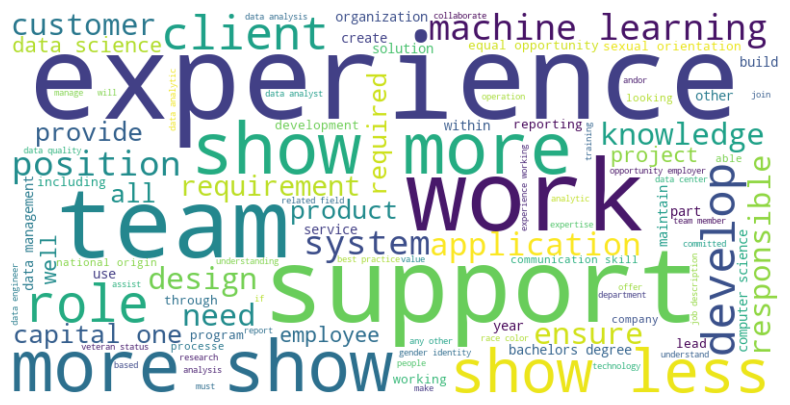

In [53]:
# generate word cloud from descriptions - 12s
eda.generate_wordcloud(merged_jobs_raw_clean_summary["job_summary"])

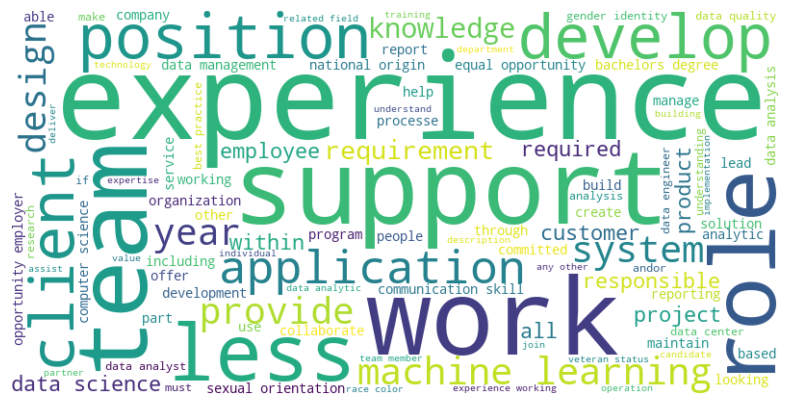

In [54]:
# generate word cloud with more stop words - 11s
more_stopwords = ["show", "more", "job", "one", "need", "ensure", "well", "will"]
eda.generate_wordcloud(merged_jobs_raw_clean_summary["job_summary"], more_stopwords)

This word cloud is similar to 2020

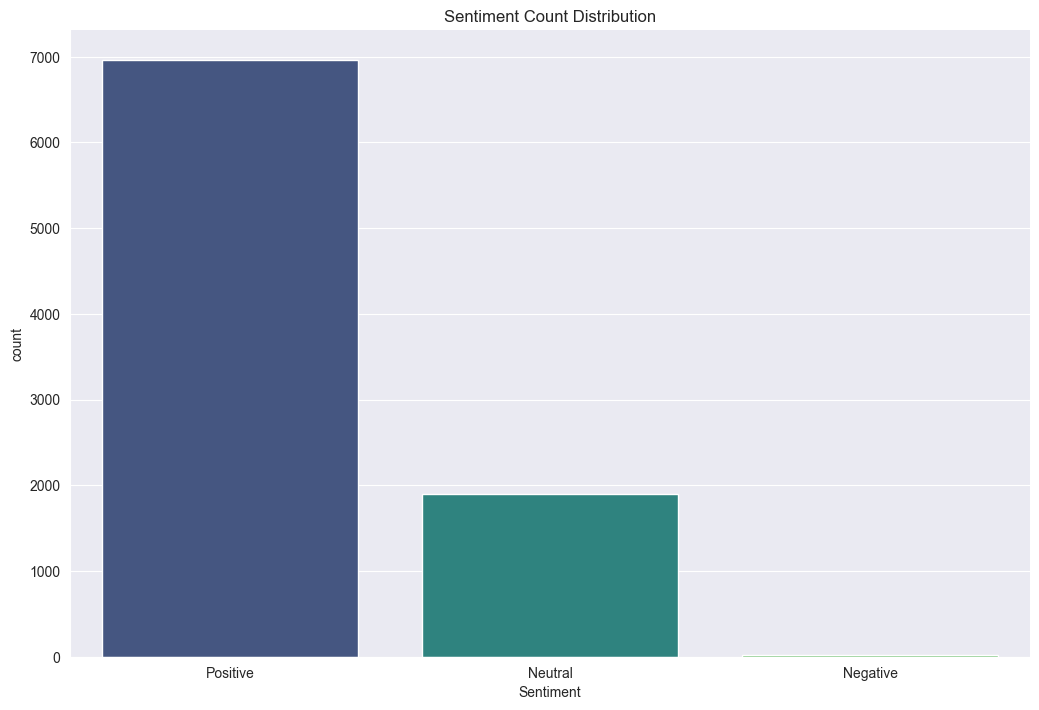

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,...,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title,Sentiment


In [55]:
# plot sentiment distribution for job descriptions in 2024
plot_sentiment = eda.plot_sentiment_distribution(merged_jobs_raw_clean_summary, "job_summary")
plot_sentiment.head(0)

Very similar distribution of Neutral to Positive sentiments with not many Negative descriptions. It appears there are more negative descriptions so it would be interesting to see what got labeled as Negative

In [56]:
plot_sentiment[plot_sentiment['Sentiment'] == "Negative"]

,job_link_x,job_summary,job_link_y,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,...,first_seen,search_city,search_country,search_position,job_level,job_type,job_link,job_skills,clean_job_title,Sentiment
122,https://www.linkedin.com/jobs/view/data-center...,the client datacenter people is working with a...,https://www.linkedin.com/jobs/view/data-center...,2024-01-19 20:05:52.361164+00,Finished NER,t,t,f,Data Center Engineer,Datacenter People,...,2024-01-14,West Springfield,United States,Computer Operator,Mid senior,Onsite,https://www.linkedin.com/jobs/view/data-center...,"UPS, Generators, HV, PDU's, CRAC units, Graphi...",data center engineer,Negative
404,https://www.linkedin.com/jobs/view/senior-data...,dice is the leading career destination for tec...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-19 14:38:47.107011+00,Finished NER,t,t,f,Senior Data Analyst in Sunnyvale CA,Dice,...,2024-01-14,Palo Alto,United States,Data Communications Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"Data Analysis, Visual Storytelling, Querying, ...",senior data analyst in sunnyvale ca,Negative
532,https://www.linkedin.com/jobs/view/database-an...,details open date 08312023 requisition number ...,https://www.linkedin.com/jobs/view/database-an...,2024-01-19 16:20:39.721045+00,Finished NER,t,t,f,Database Analyst Sr,University of Utah,...,2024-01-16,Bountiful,United States,Manager Forms Analysis,Mid senior,Onsite,https://www.linkedin.com/jobs/view/database-an...,"Database Analysis, Database Design, Data Decom...",database analyst sr,Negative
1509,https://ca.linkedin.com/jobs/view/word-data-pr...,the employee staffing and civilian recruitment...,https://ca.linkedin.com/jobs/view/word-data-pr...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Word/Data Processing Clerk III - Human Resourc...,City of Edmonton,...,2024-01-12,Alberta,Canada,Assembler Unit,Mid senior,Onsite,https://ca.linkedin.com/jobs/view/word-data-pr...,"Word processing, Information processing, Micro...",worddata processing clerk iii human resources...,Negative
1515,https://uk.linkedin.com/jobs/view/datacenter-t...,about the role our team is currently seeking a...,https://uk.linkedin.com/jobs/view/datacenter-t...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Datacenter Technician,Infotree Global Solutions,...,2024-01-12,Greater London,United Kingdom,Assembler Product,Mid senior,Onsite,https://uk.linkedin.com/jobs/view/datacenter-t...,"Data Center Technician, Hardware Troubleshooti...",datacenter technician,Negative
1605,https://www.linkedin.com/jobs/view/fraud-inves...,who we are about stripe stripe is a financial ...,https://www.linkedin.com/jobs/view/fraud-inves...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Fraud Investigations Data Analyst,Stripe,...,2024-01-13,Summit,United States,Data Communications Analyst,Mid senior,Onsite,https://www.linkedin.com/jobs/view/fraud-inves...,"Data Analysis, SQL, Fraud Analysis, Fraud Patt...",fraud investigations data analyst,Negative
3207,https://www.linkedin.com/jobs/view/senior-data...,tasks duties create complex functions scripts ...,https://www.linkedin.com/jobs/view/senior-data...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Senior Database Developer,"RecruitTalent, LLC.",...,2024-01-13,Levittown,United States,Data Base Administrator,Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-data...,"SQL, Database Design, Data Modeling, Data Qual...",senior database developer,Negative
3429,https://ca.linkedin.com/jobs/view/data-scienti...,about us at myant we are creating the worlds f...,https://ca.linkedin.com/jobs/view/data-scienti...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Data Scientist,Myant,...,2024-01-13,Etobicoke,Canada,Job Development Specialist,Mid senior,Onsite,https://ca.linkedin.com/jobs/view/data-scienti...,"Python, C/C++, Machine Learning Algorithms, Si...",data scientist,Negative
6081,https://www.linkedin.com/jobs/view/s

In [66]:
negative_words = ["bad", "terrible", "hate", "awful", "disgusting", "sad", "unpleasant", "horrible", "disappointing"]
filtered_df = plot_sentiment[plot_sentiment['Sentiment'] == "Negative"]
tokenized_df = dt.tokenize_dataframe(filtered_df, "job_summary")

negative_count = {word: 0 for word in negative_words}

for i in tokenized_df["Tokenized Text"]:
    words = [word.strip() for word in i.split(',')]
    for x in words:
        if x in negative_words:
            negative_count[x] += 1

negative_count

{'bad': 4,
 'terrible': 0,
 'hate': 3,
 'awful': 0,
 'disgusting': 0,
 'sad': 0,
 'unpleasant': 1,
 'horrible': 0,
 'disappointing': 0}

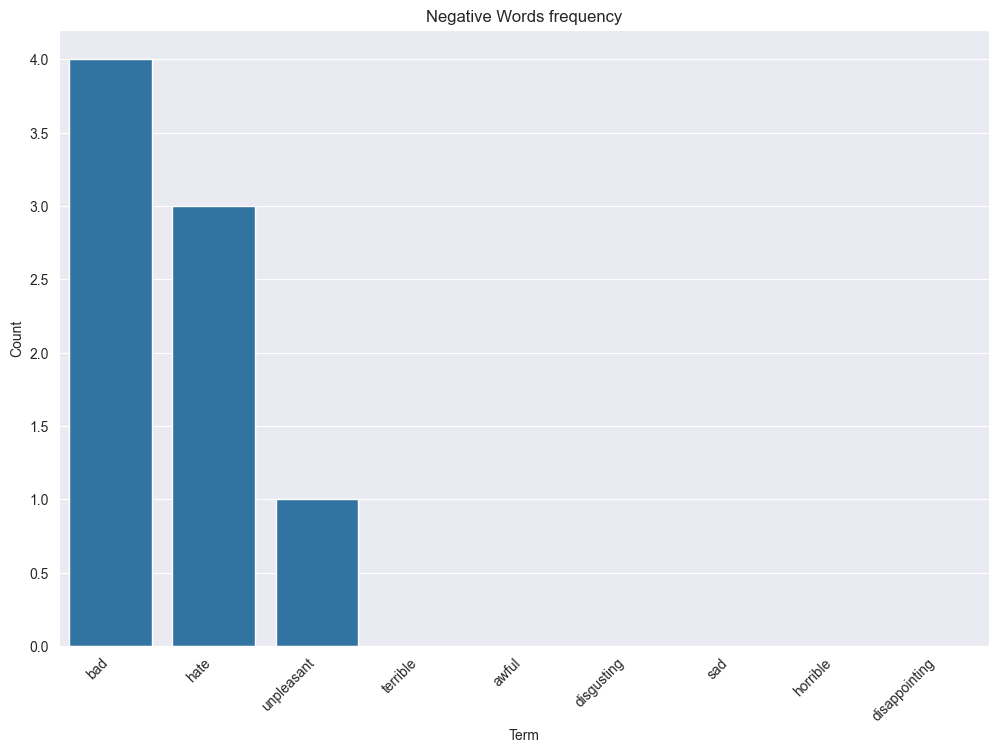

In [67]:
df_negative = pd.DataFrame({
    "word": list(negative_count.keys()),
    "count": list(negative_count.values())
})

df_negative = df_negative.sort_values('count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_negative, x="word", y="count")
plt.title('Negative Words frequency')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

We see bad and sad the most in these descriptions,

bad is being used in sentences like "bad data" or "bad practices" to identify problems you would be solving on the job

The word sad is used in the phrase:
    "environment sad runbook"
Doesn't seem like it really means anything and this was mislabeled.

The word hate being used 5 times is very interesting. After quick research, it was used in some disclaimer statements like this:
"this report includes statistics about criminal offenses hate crimes arrests and referrals for disciplinary"
Also mislabeled.

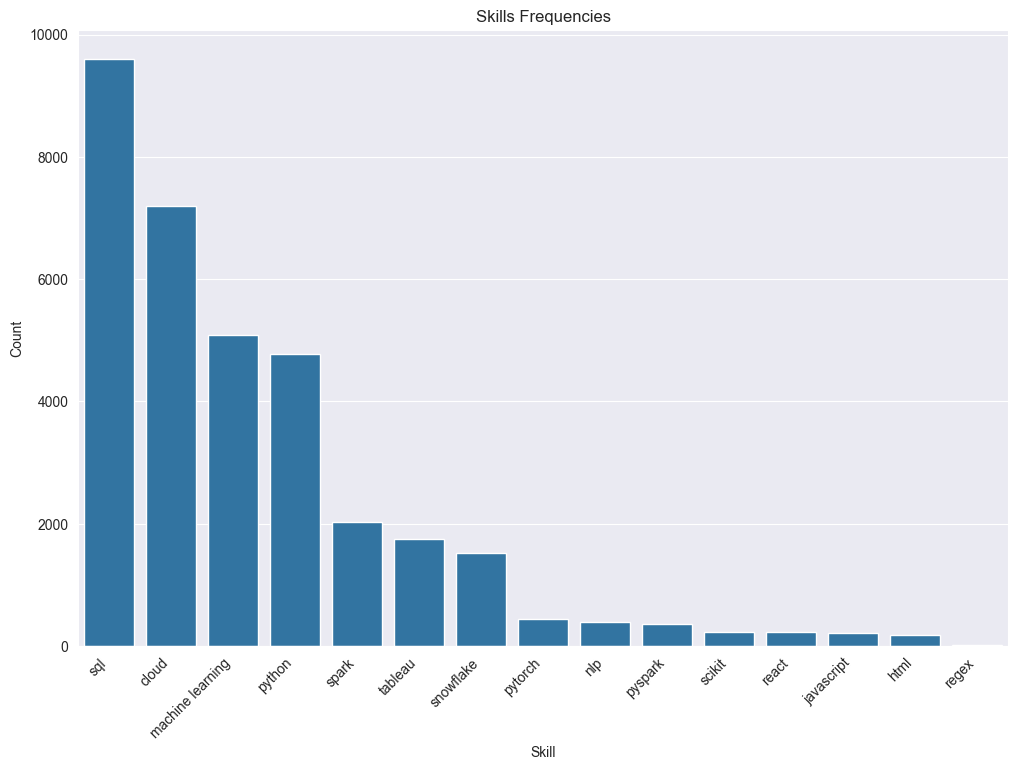

In [58]:
# plot bar chart of job skills required in 2024
df_barplot_2024 = pd.DataFrame({
    "word": list(labeled_job_skills_2024.keys()),
    "count": list(labeled_job_skills_2024.values())
})

df_barplot_2024 = df_barplot_2024.sort_values('count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_barplot_2024,x="word", y="count")
plt.title('Skills Frequencies')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

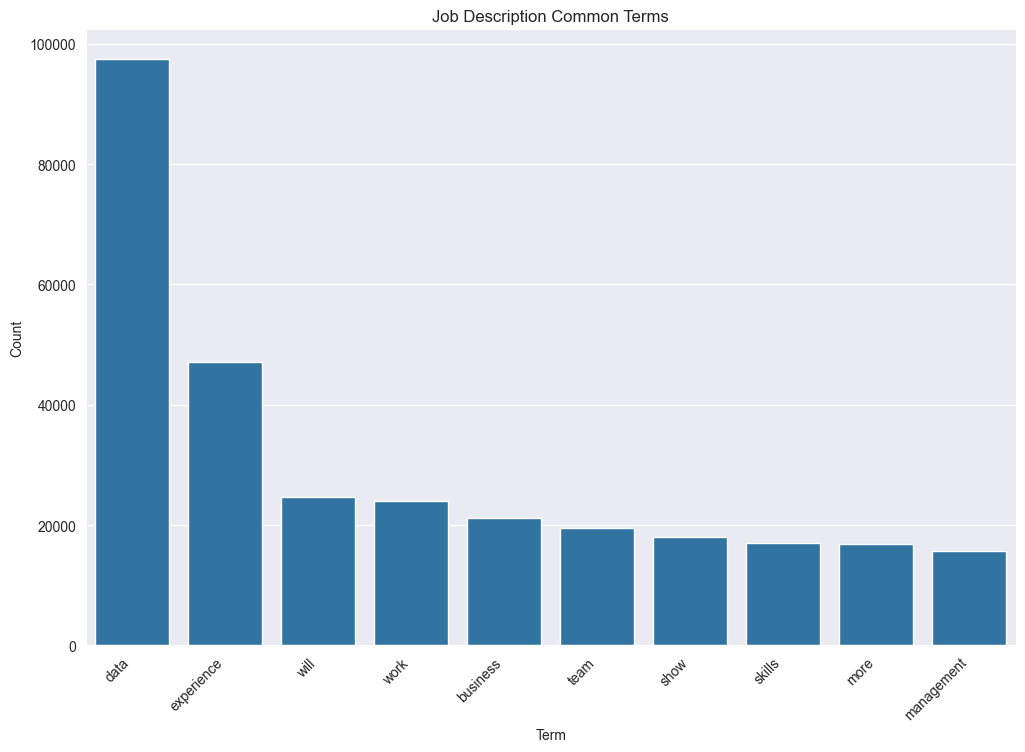

In [59]:
# plot bar chart of text summary stats
df_barplot_text_summary_2024 = pd.DataFrame({
    "word": list(text_summary_stats_2024["frequent_words"].keys()),
    "count": list(text_summary_stats_2024["frequent_words"].values())
})

df_barplot_text_summary_2024 = df_barplot_text_summary_2024.sort_values('count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_barplot_text_summary_2024,x="word", y="count")
plt.title('Job Description Common Terms')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Comparison Graphs

Compare both results

Lets see the skills barplots side by side to see what has changed in 4 years

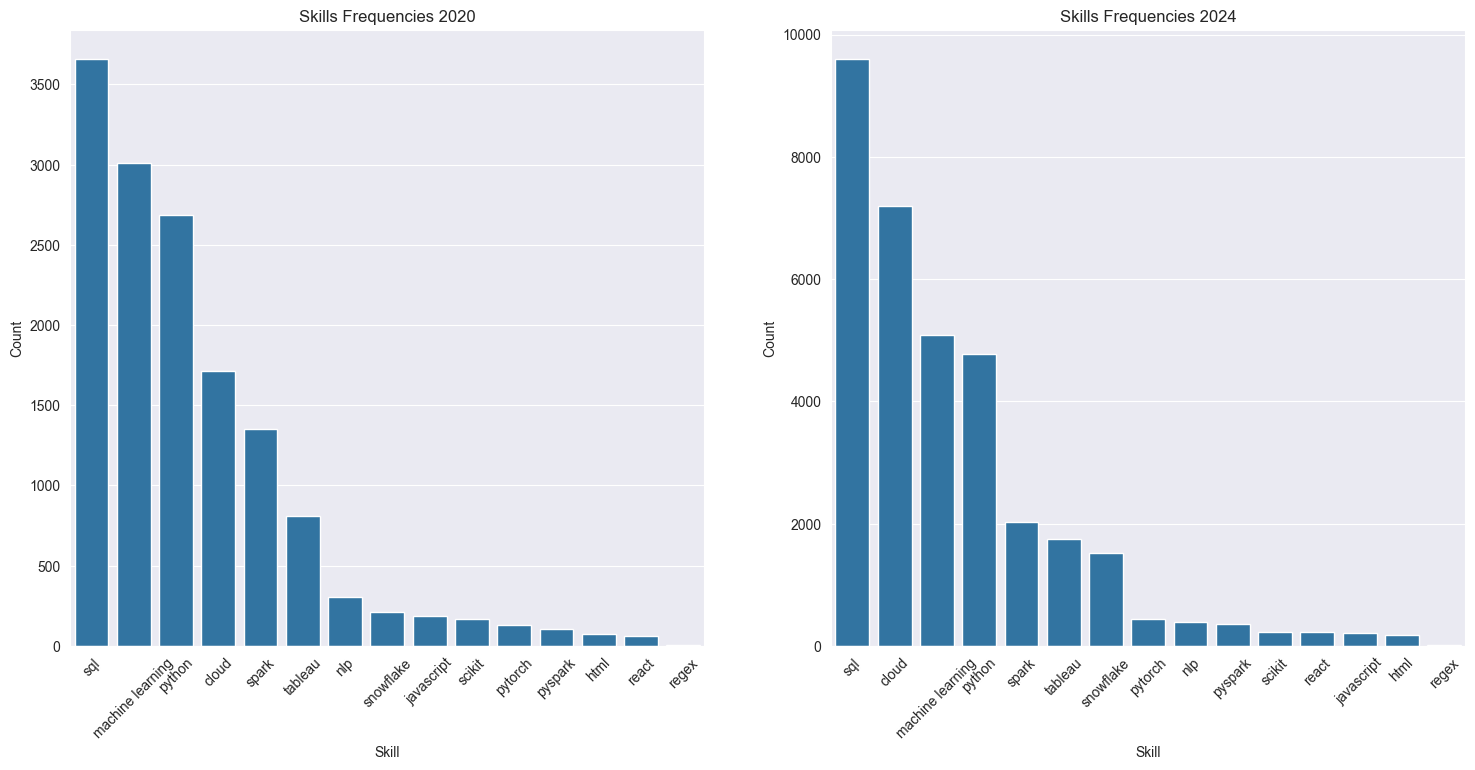

In [61]:
# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

#2020
sns.barplot(data=df_barplot_2020,x="word", y="count", ax=ax1)
ax1.set_title('Skills Frequencies 2020')
ax1.set_xlabel('Skill')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

#2024
sns.barplot(data=df_barplot_2024,x="word", y="count", ax=ax2)
ax2.set_title('Skills Frequencies 2024')
ax2.set_xlabel('Skill')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.show()

In [62]:
# normalize the data by using percentage of usage of each skill in each dataset
# total count
total_count_2020 = sum(labeled_job_skills_2020.values())
total_count_2024 = sum(labeled_job_skills_2024.values())

# Create a new dictionary with percentages
word_percentages_2020 = {word: (count / total_count_2020) * 100 for word, count in labeled_job_skills_2020.items()}
word_percentages_2024 = {word: (count / total_count_2024) * 100 for word, count in labeled_job_skills_2024.items()}


In [63]:
# create dfs of percentages to be plotted
df_barplot_2020_percentages = pd.DataFrame({
    "word": list(word_percentages_2020.keys()),
    "percentage": list(word_percentages_2020.values())
})

df_barplot_2020_percentages = df_barplot_2020_percentages.sort_values('percentage', ascending=False)

df_barplot_2024_percentages = pd.DataFrame({
    "word": list(word_percentages_2024.keys()),
    "percentage": list(word_percentages_2024.values())
})

df_barplot_2024_percentages = df_barplot_2024_percentages.sort_values('percentage', ascending=False)

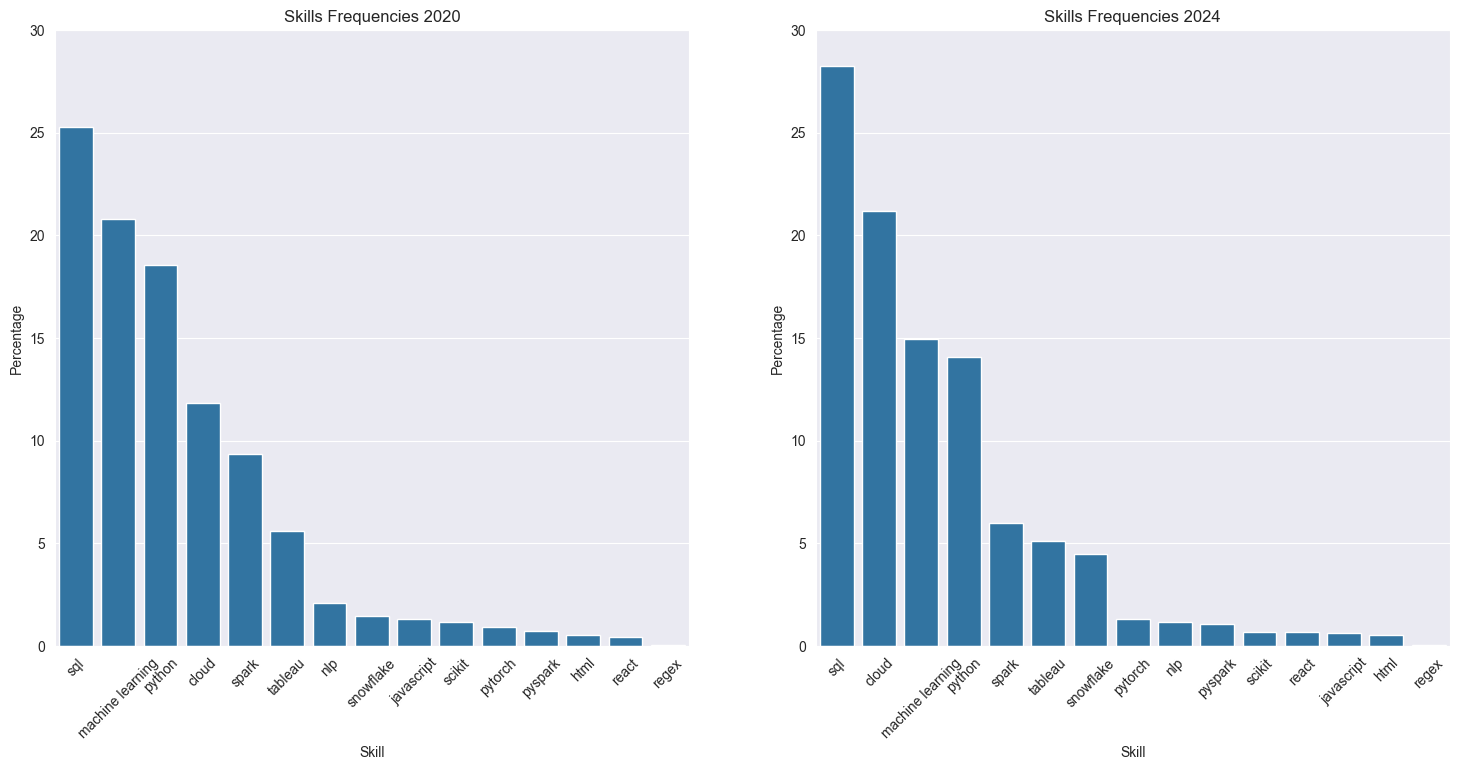

In [64]:
# plot percentages
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

#2020
sns.barplot(data=df_barplot_2020_percentages,x="word", y="percentage", ax=ax1)
ax1.set_title('Skills Frequencies 2020')
ax1.set_xlabel('Skill')
ax1.set_ylabel('Percentage')
ax1.set_ylim(0, 30)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

#2024
sns.barplot(data=df_barplot_2024_percentages,x="word", y="percentage", ax=ax2)
ax2.set_title('Skills Frequencies 2024')
ax2.set_xlabel('Skill')
ax2.set_ylabel('Percentage')
ax2.set_ylim(0, 30)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.show()

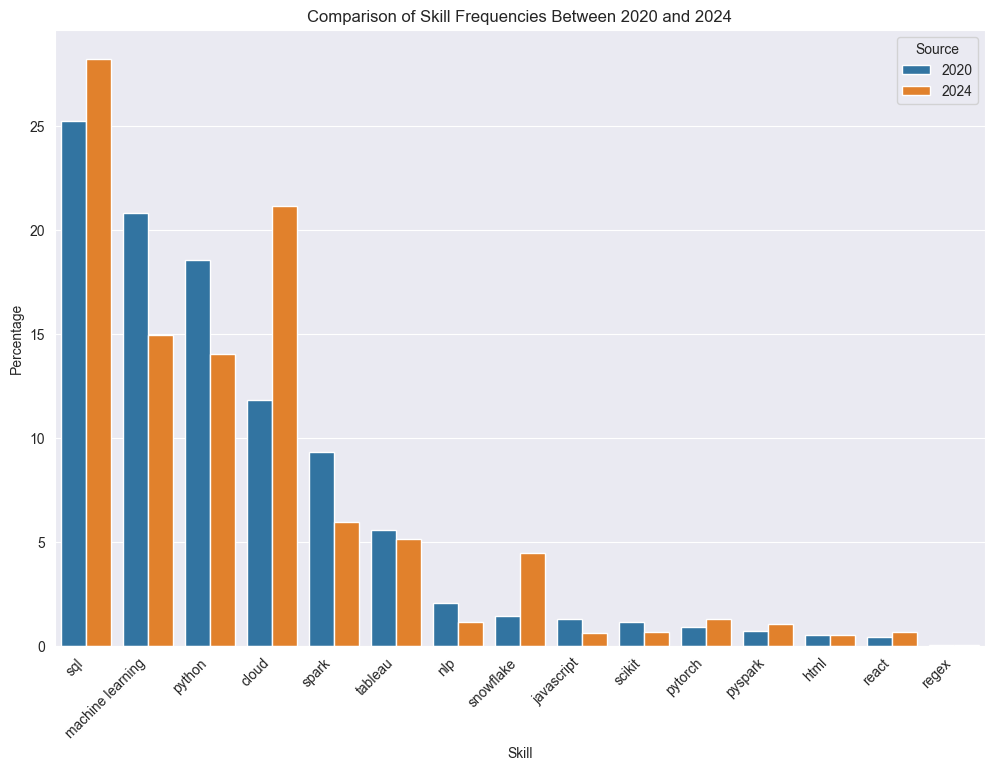

In [65]:
# overlap them to make it easier to compare
df_barplot_2020_percentages["source"] = "2020"
df_barplot_2024_percentages["source"] = "2024"

# add source column to each df before concat
combined_percentage_df = pd.concat([df_barplot_2020_percentages, df_barplot_2024_percentages])

plt.figure(figsize=(12, 8))

ax = sns.barplot(
    data=combined_percentage_df,
    x='word',
    y='percentage',
    hue='source',
    palette=['#1f77b4', '#ff7f0e']  # Choose your preferred colors
)

# Customize the plot
plt.title('Comparison of Skill Frequencies Between 2020 and 2024')
plt.xlabel('Skill')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Source')

plt.show()

### Findings

Over the past 4 years, it appears that more job descriptions request SQL skills and there has been a surge in requests for cloud skills. The frequency of cloud has almost doubled in 4 years. The increase in frequency for snowflake skills has about tripled.

Scikit and NLP skills don't appear as much as expected. This could lead you to believe that companies don't want Data Scientists to be doing as much machine learning anymore and could be designating  those tasks to Machine Learning Engineers, but the sample size is too small to make this conclusion and these skills could be implied. It could also mean that companies want more applicants to have database and data management skills. You could say that with the large increase in Snowflake usage.

Considering Data management, storage, and administration are important functions and are usually dedicated to roles like Database Administrators, Data Analysts, Cloud Engineers, etc, companies could want Data Scientists to fill those roles as well as program in Python and train ML models.

